# Programming Assignment
Student Name: Zhi Zhang<br/>
Student Number: 18210054

In [1]:
import pandas as pd
import numpy as np
import math
import string
import matplotlib.pyplot as plt
%matplotlib inline 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer 

## Build up a neural network

In [23]:
class NeuralNetwork:   
    def __init__(self, NI, NH, NO, activation='sigmoid'):  
        self.NI = NI        # Number of inputs
        self.NH = NH        # Number of hidden units
        self.NO = NO        # number of outputs
        self.W1 = np.array  # Array containing the weights in the lower layer
        self.W2 = np.array  # Array containing the weights in the upper layer
        self.dW1 = np.array # Arrays containing the weight *changes* to be applied onto W1
        self.dW2 = np.array # Arrays containing the weight *changes* to be applied onto W2
        self.Z1 = np.array  # Arrays containing the activations for the lower layer
        self.Z2 = np.array  # Array containing the activations for the upper layer
        self.H = np.array   # Array where the values of the hidden neurons are stored
        self.O = np.array   # Array where the outputs are stored
        
        if activation == 'sigmoid':  
            self.activation = self.sigmoid  
            self.activation_deriv = self.sigmoid_derivative  
        elif activation == 'tanh':   
            self.activation = self.tanh  
            self.activation_deriv = self.tanh_derivative
    
    def sigmoid(self, x):  
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):  
        return np.exp(-x) / (1 + np.exp(-x)) ** 2
    
    def tanh(self, x):  
        return (2 / (1 + np.exp(x * -2))) - 1
    
    def tanh_derivative(self, x):  
        return 1 - np.tanh(x)**2
    
    def randomise(self):      
        # Hidden layer
        self.W1 = np.random.uniform(-1, 1, (self.NI, self.NH))
        # Output layer
        self.W2 = np.random.uniform(-1, 1, (self.NH, self.NO))
        self.dW1 = np.random.uniform(0, 0, (self.NI, self.NH))
        self.dW2 = np.random.uniform(0, 0, (self.NH, self.NO))
    
    def forward(self, input_vectors):
        self.Z1 = np.dot(input_vectors, self.W1)
        self.H = self.activation(self.Z1)
        self.Z2 = np.dot(self.H, self.W2)
        self.O = self.activation(self.Z2)
        return self.O        
            
    def backwards(self, deltas, input_vectors):
        # Calculating delta from the second last level 
        deltas.append(deltas[-1].dot(self.W2.T)*self.activation_deriv(self.H))  

        # Arranging deltas in the order of feed-forward neural networks
        deltas.reverse()

        layer =np.atleast_2d(input_vectors)
        delta = np.atleast_2d(deltas[0]) 
        self.dW1 = layer.T.dot(delta) 

        layer =np.atleast_2d(self.H)
        delta = np.atleast_2d(deltas[1])
        self.dW2 = layer.T.dot(delta) 
        return deltas
    
    def update_weights(self, learning_rate):
        self.W1 = np.add(self.W1, learning_rate * self.dW1)
        self.W2 = np.add(self.W2, learning_rate * self.dW2)
        self.dW1 = np.array
        self.dW2 = np.array
    
    def train(self, X, y, learning_rate=0.05, epochs=100000, detail=False, error_threshold=10000, log=None):     
        self.randomise()
        X = np.array(X)                 
        y = np.array(y)
        errors = []
        for e in range(epochs):  
            # Random select a sample
            i = np.random.randint(X.shape[0])   
            
            self.forward(X[i])
            
            # Calculate the last layer error
            error = y[i] - self.O  
            deltas = [error * self.activation_deriv(self.O)]
    
            self.backwards(deltas,X[i])
            self.update_weights(learning_rate)
            
            if (detail == True) & (e % error_threshold == 0):
                print('Epoch: {} \t Loss: {}'.format(e,np.round(error,5)), file=log)
                errors.append(error)
        return errors
    
    def predict(self, inputs):                 
        return self.forward(np.array(inputs))

## Regular Test

### 1&2. Train NN on XOR function and test accuracy
1. **Train an MLP with 2 inputs, 3-4+ hidden units and one output on XOR function.**
    <br/>((0, 0), 0)
    <br/>((0, 1), 1)
    <br/>((1, 0), 1)
    <br/>((1, 1), 0)
2. **At the end of training, check if the MLP predicts correctly all the examples.**
    

In [3]:
NN = NeuralNetwork(NI = 2, NH = 10, NO = 1, activation = 'tanh')

X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

y = np.array([0, 1, 1, 0])

XOR_log = open("XOR_log.txt", "w")
print("XOR\n", file=XOR_log)

print('\n************* Training *************\n', file=XOR_log)
errors = NN.train(X, y, learning_rate=0.05, epochs=10000, detail=True, error_threshold=1000, log=XOR_log)

print('\n*************** Test ***************\n', file=XOR_log)
results = []
for in_, out_ in zip(X,y):
    pred = NN.predict(in_)
    results.append(pred)
    result = 1 if pred > 0.5 else 0
    print('{} -> [{}] \t Expect Output: [{}] \t Actual Output: {}'.format(in_, result, out_, np.round(pred,5)), file=XOR_log)

XOR_log.close()
f = open("XOR_log.txt", "r")
print(f.read())

XOR


************* Training *************

Epoch: 0 	 Loss: [1.42588]
Epoch: 1000 	 Loss: [0.25699]
Epoch: 2000 	 Loss: [0.07589]
Epoch: 3000 	 Loss: [0.]
Epoch: 4000 	 Loss: [0.02537]
Epoch: 5000 	 Loss: [0.]
Epoch: 6000 	 Loss: [0.01712]
Epoch: 7000 	 Loss: [0.01335]
Epoch: 8000 	 Loss: [0.]
Epoch: 9000 	 Loss: [0.00975]

*************** Test ***************

[0 0] -> [0] 	 Expect Output: [0] 	 Actual Output: [0.]
[0 1] -> [1] 	 Expect Output: [1] 	 Actual Output: [0.99141]
[1 0] -> [1] 	 Expect Output: [1] 	 Actual Output: [0.99103]
[1 1] -> [0] 	 Expect Output: [0] 	 Actual Output: [0.01158]



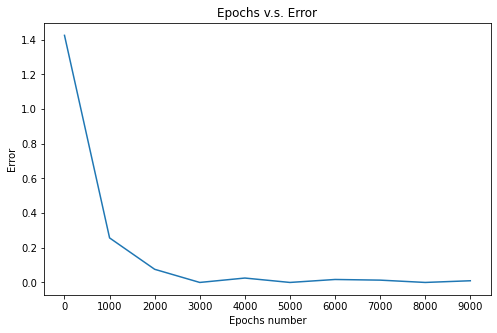

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(errors)
plt.xlabel("Epochs number")
plt.ylabel("Error")
plt.title("Epochs v.s. Error")
plt.xticks(list(range(10)), np.arange(0,10000,1000))
plt.show()

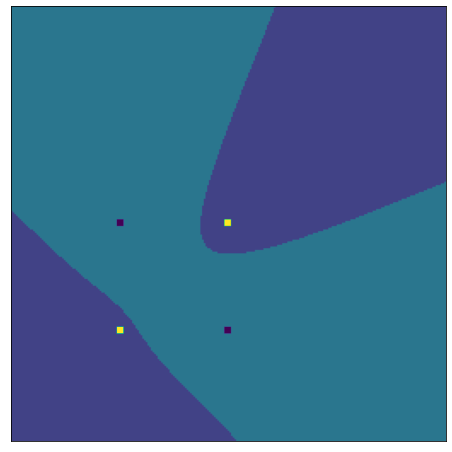

In [5]:
# Plot
N = 255
x1 = np.linspace(-1,3,N)
x2 = np.linspace(-1,3,N)
image= np.zeros((N,N))
for i in range(N):
    for j in range(N):
        X_temp=[x1[i],x2[j]]

        y_temp=NN.predict(X_temp)
        if y_temp < 0.5:
            image[i,N-1-j] = 50
        else:   
            image[i,N-1-j] = 100

I = image.T
for i in range(len(results)):          
    indexi = int(np.round((X[i,0]+1)*254/4))
    indexj = int(np.round((X[i,1]+1)*254/4))
    if results[i] < 0.5:
        I[N-1-indexj-2:N-1-indexj+2,indexi-2:indexi+2]=255
    else:   
        I[N-1-indexj-2:N-1-indexj+2,indexi-2:indexi+2]=0
plt.figure(figsize=(8, 8))
plt.imshow(I)
plt.xticks([])
plt.yticks([]);

### 3&4
3. Generate 500 vectors containing 4 components each. The value of each component should be a random number between -1 and 1. These will be your input vectors. The corresponding output for each vector should be the sin() of a combination of the components. 

    Specifically, for inputs: [x1 x2 x3 x4] the (single component) output should be: sin(x1-x2+x3-x4). 
    
    Now train an MLP with 4 inputs, at least 5 hidden units and one output on 400 of these examples and keep the remaining 100 for testing.

4. What is the error on training at the end? How does it compare with the error on the test set? Do you think you have learned satisfactorily?

Generate input data: a `500*4` matrix with random values between `-1` and `1`

In [6]:
input_data = np.random.uniform(size = (500,4), low = -1, high = 1)
print(input_data.shape)
input_data

(500, 4)


array([[-0.08137603,  0.57316526,  0.54258297,  0.91568197],
       [ 0.47871433, -0.78603084, -0.45667646, -0.73795333],
       [-0.59095378,  0.90550617,  0.91306626, -0.24684514],
       ...,
       [-0.07572471, -0.07272949, -0.12389602, -0.82771176],
       [-0.60445419,  0.92594712,  0.76990473, -0.02777421],
       [ 0.91328673, -0.93766239, -0.17073829,  0.64027805]])

Generate output data: `sin(x1-x2+x3-x4)`

In [7]:
def sin_each(x):
    return [math.sin(x[0]-x[1]+x[2]-x[3])]
output_data = np.array(list(map(sin_each, input_data)))
print(output_data.shape)

(500, 1)


The split dataset makes it `400 training sets` and `100 test sets`.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

Now train a MLP with `4 inputs`, `at least 5 hidden units` and `1 output` on 400 of these examples

In [9]:
def accuracy(test, pred):
    acc = 1 - np.abs(test - pred).mean()
    rmse = math.sqrt(mean_squared_error(test, pred))
    return [acc,rmse]

NN = NeuralNetwork(NI = 4, NH = 10, NO = 1, activation = 'tanh')

SIN_log = open("SIN_log.txt", "w")
print("SIN\n", file=SIN_log)

print('\n************* Training *************', file=SIN_log)
errors = NN.train(X_train, y_train, learning_rate=0.05, epochs=100000, detail=True, log=SIN_log)
results = []
for x in X_train:
    results.append(NN.predict(x))
acc, rmse = accuracy(y_train, results)
print('\nThe RMSE of \"training set\" is {} \tAccuracy = {}'.format(np.round(rmse,2), np.round(acc,2)), file=SIN_log)
    
print('\n*************** Test ***************', file=SIN_log)
results = []
for x in X_test:
    results.append(NN.predict(x))
    
acc, rmse = accuracy(y_test, results)
print('\nThe RMSE of \"test set\" is {} \tAccuracy = {}'.format(np.round(rmse,2), np.round(acc,2)), file=SIN_log)

SIN_log.close()
f = open("SIN_log.txt", "r")
print(f.read())

SIN


************* Training *************
Epoch: 0 	 Loss: [1.46085]
Epoch: 10000 	 Loss: [0.10912]
Epoch: 20000 	 Loss: [-0.00702]
Epoch: 30000 	 Loss: [0.00816]
Epoch: 40000 	 Loss: [-0.02094]
Epoch: 50000 	 Loss: [0.00897]
Epoch: 60000 	 Loss: [-0.04861]
Epoch: 70000 	 Loss: [0.08656]
Epoch: 80000 	 Loss: [-0.05076]
Epoch: 90000 	 Loss: [-0.08769]

The RMSE of "training set" is 0.07 	Accuracy = 0.94

*************** Test ***************

The RMSE of "test set" is 0.07 	Accuracy = 0.94



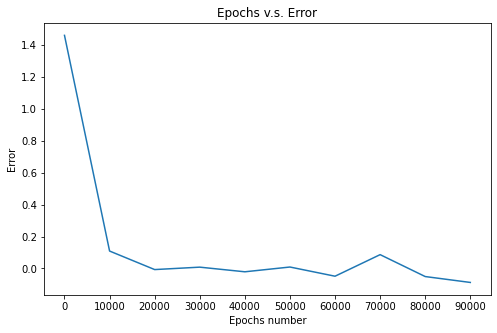

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(errors)
plt.xlabel("Epochs number")
plt.ylabel("Error")
plt.title("Epochs v.s. Error")
plt.xticks(list(range(10)), np.arange(0,100000,10000))
plt.show()

## Special Test 

### Letter Recognition
First we read data set

In [11]:
df = pd.read_csv('letter-recognition.data',header=None)
print(df.shape)
df.head()

(20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
# Take first letters column
letters = df[0].values

# ord() function takes string argument of a single Unicode character 
# and return its integer Unicode code point value,
# Since letter `A` is 65, we start from it.
for i in range(len(letters)):
    letters[i] = ord(letters[i]) - ord('A')

# Assign back to dataframe
df[0] = letters

X = np.array(df.loc[:,1:])
y = np.array(df[0])

labels= LabelBinarizer().fit_transform(y.astype('int'))
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

Split the dataset in a training part containing approximately 4/5 of the records, and a testing part containing the rest.

MLP should have as many inputs as there are attributes (17), start at 10 hidden units and 26 outputs (one for each letter of the alphabet).

In [13]:
def predict_and_score(NN, X, y):
    correct_num = 0
    predict = NN.predict(X)
    total = len(y)
    for i in range(total):
        if np.argmax(y[i]) == np.argmax(predict[i]):
            correct_num += 1
    return correct_num/total #accuracy

def hyperparameter_tuning(NI, NH, NO, activation, learning_rate, epochs, X=X, labels=labels, log=None): 
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
    
    NN = NeuralNetwork(NI, NH, NO, activation)

    #print('\n************* Training *************')
    NN.train(X_train, y_train, learning_rate, epochs, detail=True, log=log)

    #print('\n*************** Test ***************')
    train_score = predict_and_score(NN, X_train, y_train)
    test_score = predict_and_score(NN, X_test, y_test)
    print('\nThe accuracy of \"training set\" is {} \nThe accuracy of \"test set\" is {}'.format(train_score,test_score), file=log)
    return test_score

LR_log = open("Letter_recognition_log.txt", "w")
print("Letter recognition\n", file=LR_log)
hyperparameter_tuning(NI = 16, NH = 10, NO = 26, activation = 'sigmoid', learning_rate = 0.05, epochs = 100000, log=LR_log)
LR_log.close()
f = open("Letter_recognition_log.txt", "r")
print(f.read())

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_73441/2971511375.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Letter recognition

Epoch: 0 	 Loss: [-0.32494 -0.14358 -0.39394 -0.56583 -0.20133 -0.67771 -0.22263 -0.60691
 -0.91344  0.93243 -0.70274 -0.68865 -0.41642 -0.80759 -0.83092 -0.91667
 -0.51315 -0.289   -0.29925 -0.58153 -0.60897 -0.73264 -0.72451 -0.34829
 -0.48309 -0.50663]
Epoch: 10000 	 Loss: [-0.044   -0.04761 -0.02986 -0.0323  -0.04411 -0.03863 -0.03032 -0.04661
 -0.04501 -0.02931 -0.03217 -0.03444 -0.02762 -0.04101 -0.02811 -0.03656
 -0.03887 -0.0368  -0.03077 -0.03302  0.94781 -0.03184 -0.04478 -0.04744
 -0.03421 -0.04951]
Epoch: 20000 	 Loss: [-0.0457  -0.04205 -0.04257 -0.06047 -0.04358 -0.0313  -0.03771  0.96342
 -0.04675 -0.0452  -0.03906 -0.05209 -0.02894 -0.03233 -0.03581 -0.03342
 -0.04779 -0.04568 -0.04095 -0.01847 -0.02325 -0.00928 -0.01611 -0.04017
 -0.0215  -0.04031]
Epoch: 30000 	 Loss: [-0.04908 -0.03267 -0.0449  -0.05541 -0.04216 -0.01974 -0.06022 -0.04846
 -0.04764 -0.04147 -0.03251 -0.04332 -0.01373 -0.02978 -0.04396 -0.0295
 -0.06452 -0.04066 -0.04471 -0.01095 -

⬇️ Cautious! It takes a long time to run! ~10 mins

In [14]:
Rank_log = open("Rank_log.txt", "w")
print("Letter recognition - huperparameter tuning\n", file=Rank_log)
rank = {}
for NH in range(10,200,20):
    for epochs in [1000,10000,100000,1000000]:
        name = 'NH' + str(NH) + '_rate0.05_' + str(epochs) + 'eps_sigmoid'
        print('\n==================================================\n\n',name, file=Rank_log)
        rank[name] = hyperparameter_tuning(NI = 16, NH = NH, NO = 26, activation = 'sigmoid', 
                                           learning_rate = 0.05, epochs = epochs, log=Rank_log)
Rank_log.close()
# f = open("Rank_log.txt", "r")
# print(f.read())

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_73441/2971511375.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [15]:
rank_sorted = sorted(rank.items(), key=lambda x: x[1], reverse=True)

NH190 = []
NH170 = []
NH150 = []
NH130 = []
NH110 = []
eps100 = []
eps1k = []
eps10k = []
eps100k = []
eps1m = []
for i,v in rank.items():
    if 'NH190' in i:
        NH190.append(v)
    elif 'NH170' in i:
        NH170.append(v)
    elif 'NH150' in i:
        NH150.append(v)
    elif 'NH130' in i:
        NH130.append(v)
    elif 'NH110' in i:
        NH110.append(v)
    if '100eps' in i:
        eps100.append(v)
    elif '1000eps' in i:
        eps1k.append(v) 
    elif '10000eps' in i:
        eps10k.append(v)
    elif '100000eps' in i:
        eps100k.append(v)
    elif '1000000eps' in i:
        eps1m.append(v)

top = rank_sorted[0]
top

('NH170_rate0.05_1000000eps_sigmoid', 0.72525)

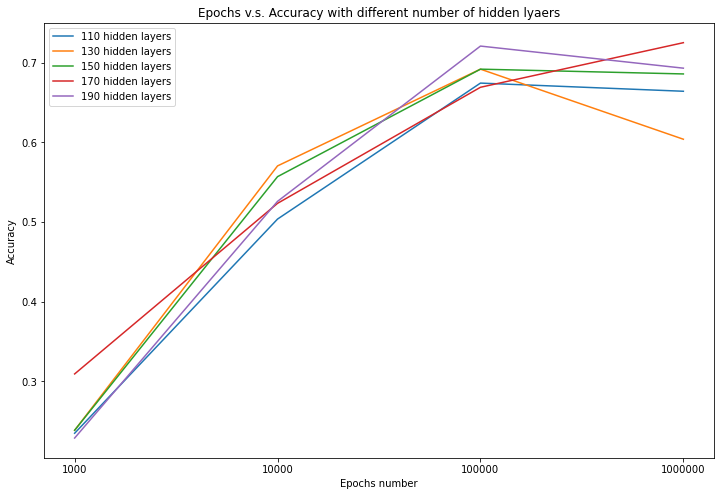

In [16]:
plt.figure(figsize=(12, 8))
x = [1000,10000,100000,1000000]

id = 110
for y in [NH110,NH130,NH150,NH170,NH190]:
    plt.plot(y,label = '{} hidden layers'.format(id))
    id += 20
    

plt.xlabel("Epochs number")
plt.ylabel("Accuracy")
plt.title("Epochs v.s. Accuracy with different number of hidden lyaers")
plt.xticks(list(range(len(x))), x)
plt.legend()
plt.show()

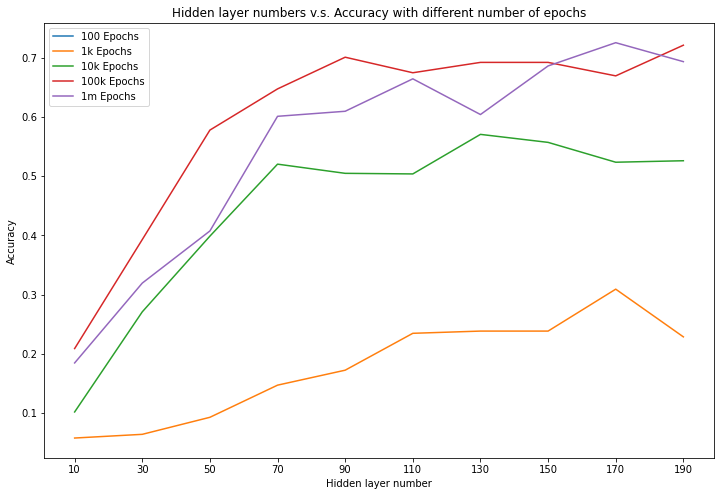

In [17]:
plt.figure(figsize=(12, 8))
x = np.arange(10,200,20)
id = ['100','1k','10k','100k','1m']
for y,i in zip([eps100,eps1k,eps10k,eps100k,eps1m],id):
    plt.plot(y,label = '{} Epochs'.format(i))
plt.xlabel("Hidden layer number")
plt.ylabel("Accuracy")
plt.title("Hidden layer numbers v.s. Accuracy with different number of epochs")
plt.xticks(list(range(len(x))), x)
plt.legend(loc='upper left')
plt.show()

Best parameters: `NH170_rate0.05_1000000eps_sigmoid`, 0.72525

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
    
NN = NeuralNetwork(16, 170, 26, "sigmoid")

LR_log = open("Letter_recognition_log.txt", "w")
print("Letter recognition\n", file=LR_log)

#print('\n************* Training *************')
NN.train(X_train, y_train, 0.05, 1000000, detail=True, log=LR_log)

#print('\n*************** Test ***************')
train_score = predict_and_score(NN, X_train, y_train)
test_score = predict_and_score(NN, X_test, y_test)
print('\nThe accuracy of \"training set\" is {} \nThe accuracy of \"test set\" is {}'
      .format(train_score,test_score), file=LR_log)
LR_log.close()
# Only print last 2 lines
f = open("Letter_recognition_log.txt", "r")
for line in (f.readlines() [-2:]):
    print(line, end ='')

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_73441/2971511375.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


The accuracy of "training set" is 0.7185 
The accuracy of "test set" is 0.71625


In [19]:
def to_character(output_vector):
    output = []
    for i in output_vector:
        output.append(chr(np.argmax(i) + ord('A')))
    return output

predict = NN.predict(X_test)

success_predicted = []
for i,j in zip(y_test,predict):
    if np.argmax(i) == np.argmax(j):
        success_predicted.append(i)

success_pred = to_character(success_predicted)
test = to_character(y_test)

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_73441/2971511375.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [20]:
test_count = sorted(Counter(test).items())
pred_count = sorted(Counter(success_pred).items())

pred_rate = {x : np.round(float(Counter(success_pred)[x])/Counter(test)[x],2) for x in Counter(test)}
letter_recognition_rate = dict(sorted(pred_rate.items(),reverse=True))

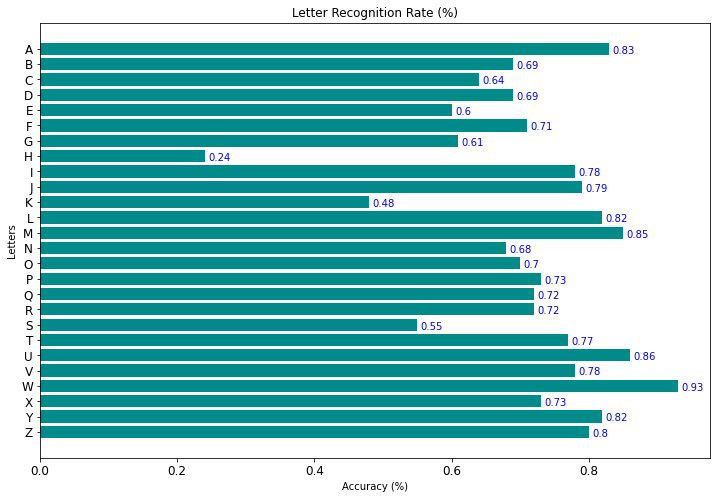

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))
letters = list(string.ascii_uppercase)
letters.reverse()
plt.barh(range(len(letter_recognition_rate)), letter_recognition_rate.values(), color='darkcyan', align='center')
plt.yticks(list(range(len(letters))), letters)
for i, v in enumerate(letter_recognition_rate.values()):
    ax.text(v+.005 , i-.3, str(v), color='blue')
plt.xlabel("Accuracy (%)")
plt.ylabel("Letters")
plt.title("Letter Recognition Rate (%)")
ax.tick_params(axis='both', which='both', labelsize=12)
plt.show()